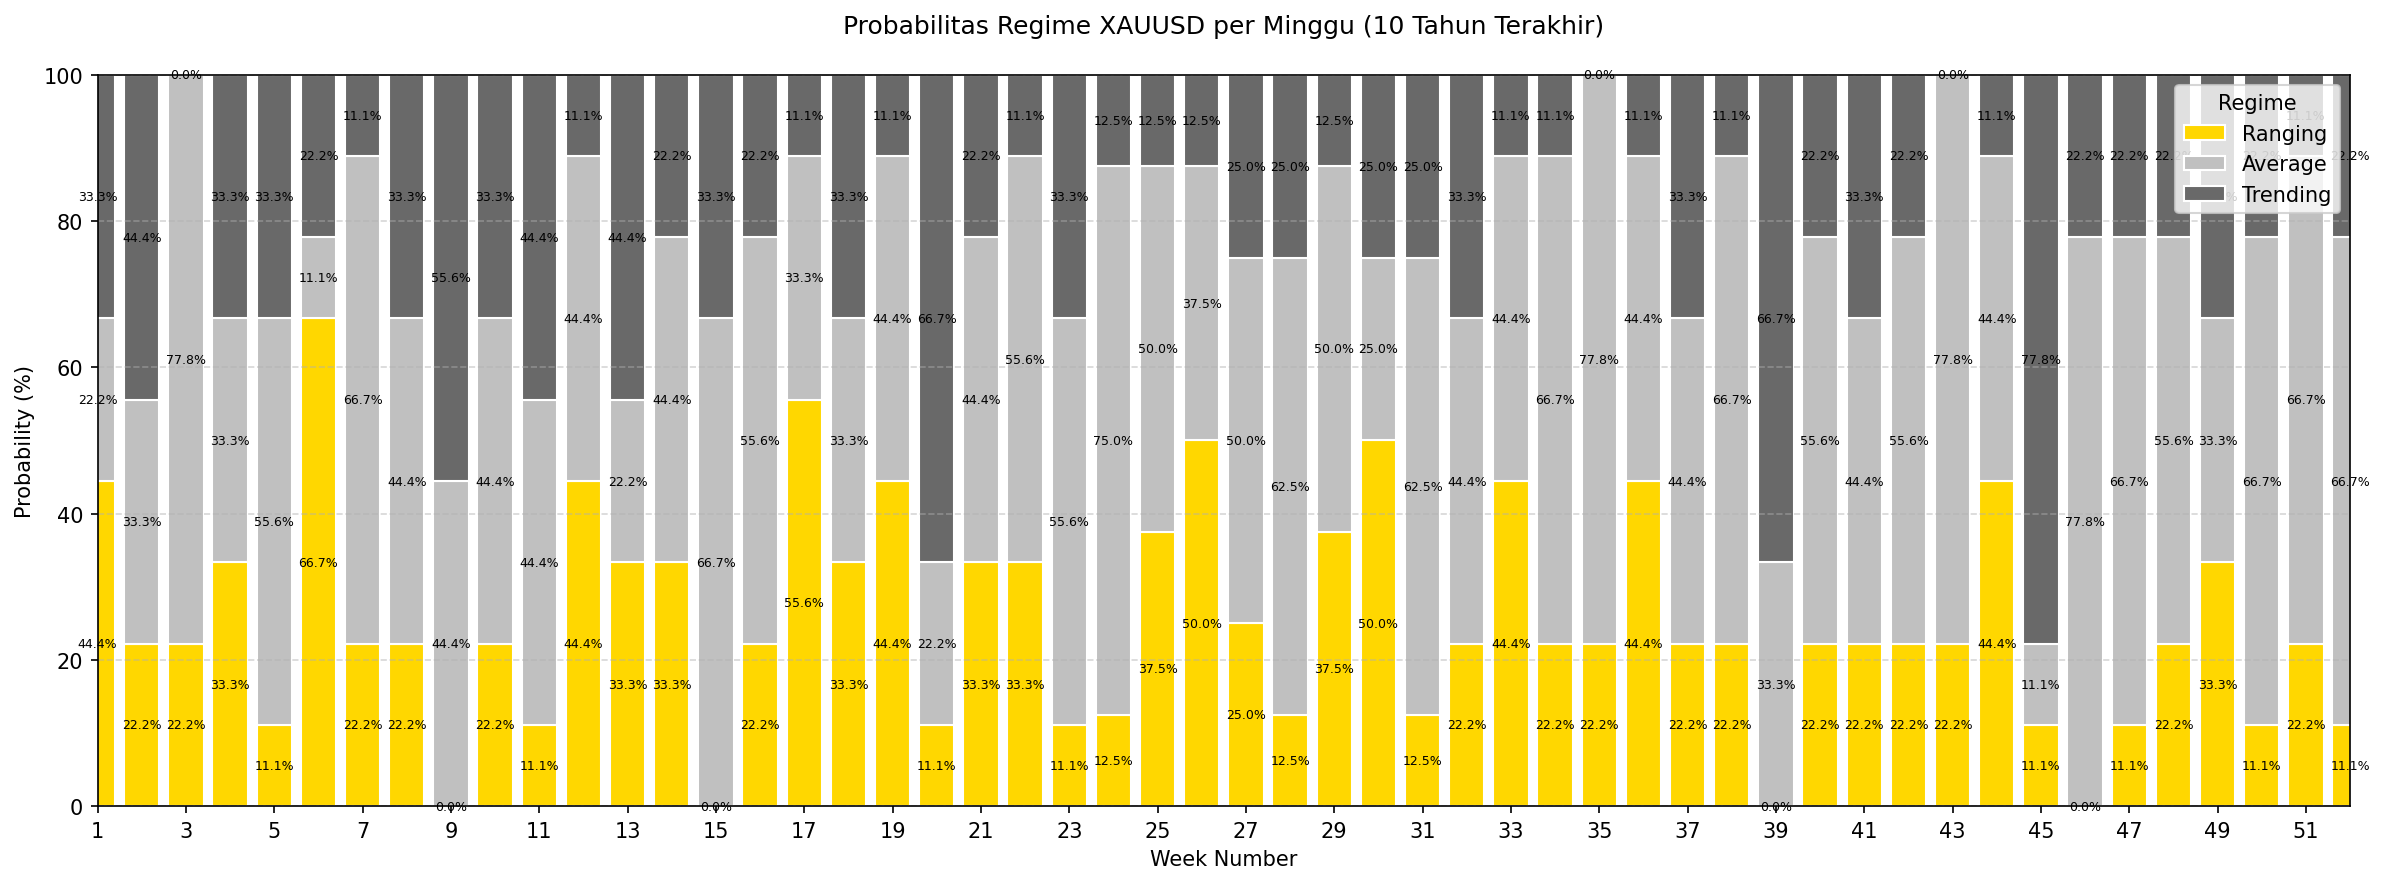

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Load & prepare data
df = pd.read_csv("XAUUSD_Daily_201608090000_202506080000.csv", delim_whitespace=True)
df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

# Weekly close-to-close range
weekly = df['CLOSE'].resample('W').agg(['first', 'last']).dropna()
weekly['range'] = (weekly['last'] - weekly['first']).abs()
weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

# Filter last 10 years
latest_years = sorted(weekly['year'].unique())[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# Quantile-based classification per year
def classify_by_quantile(group):
    q1 = group['range'].quantile(0.25)
    q3 = group['range'].quantile(0.75)
    return group['range'].apply(lambda x: 'Ranging' if x <= q1 
                                         else 'Trending' if x >= q3 
                                         else 'Average')

weekly['regime'] = weekly.groupby('year', group_keys=False).apply(classify_by_quantile)

# Compute probabilities per week
prob = weekly.groupby(['week', 'regime']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with annotations
colors = {'Ranging': 'gold', 'Average': 'silver', 'Trending': 'dimgray'}
fig, ax = plt.subplots(figsize=(16, 6), dpi=150)

bottom = np.zeros(len(prob))
containers = []
for regime in ['Ranging', 'Average', 'Trending']:
    vals = prob.get(regime, pd.Series(0, index=prob.index))
    bars = ax.bar(prob.index, vals, bottom=bottom, color=colors[regime], 
                  label=regime, edgecolor='white')
    containers.append(bars)
    bottom += vals

# Annotate each bar segment with its percentage
for container in containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=6, color='black')

ax.set_xlabel('Week Number')
ax.set_ylabel('Probability (%)')
ax.set_title('Probabilitas Regime XAUUSD per Minggu (10 Tahun Terakhir)', pad=20)
ax.set_xlim(1, 52)
ax.set_xticks(np.arange(1, 53, 2))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(loc='upper right', title='Regime')

plt.tight_layout()
plt.savefig("XAUUSD_weekly_regime_prob.png", dpi=300)
plt.show()


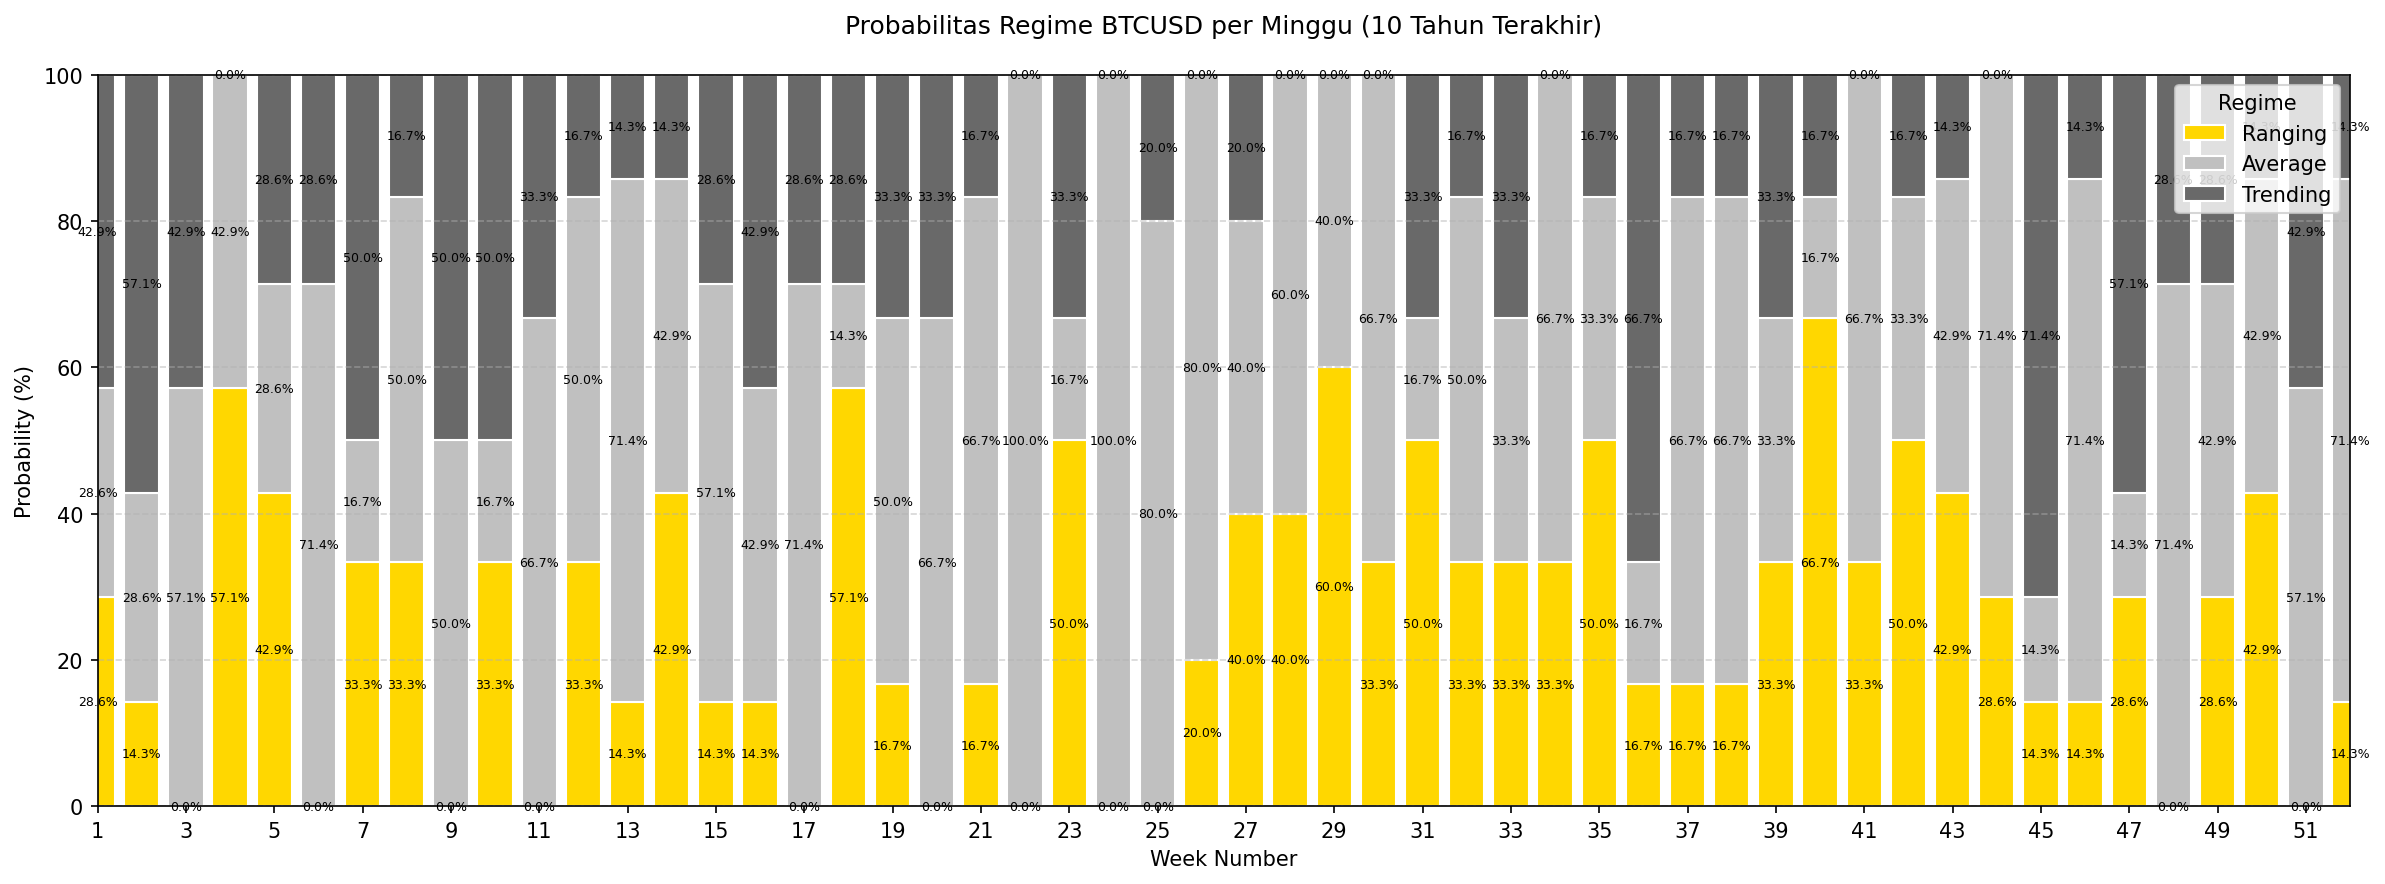

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Load & prepare data
df = pd.read_csv("BTCUSD_Daily_201803270000_202506080000.csv", delim_whitespace=True)
df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

# Weekly close-to-close range
weekly = df['CLOSE'].resample('W').agg(['first', 'last']).dropna()
weekly['range'] = (weekly['last'] - weekly['first']).abs()
weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

# Filter last 10 years
latest_years = sorted(weekly['year'].unique())[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# Quantile-based classification per year
def classify_by_quantile(group):
    q1 = group['range'].quantile(0.25)
    q3 = group['range'].quantile(0.75)
    return group['range'].apply(lambda x: 'Ranging' if x <= q1 
                                         else 'Trending' if x >= q3 
                                         else 'Average')

weekly['regime'] = weekly.groupby('year', group_keys=False).apply(classify_by_quantile)

# Compute probabilities per week
prob = weekly.groupby(['week', 'regime']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with annotations
colors = {'Ranging': 'gold', 'Average': 'silver', 'Trending': 'dimgray'}
fig, ax = plt.subplots(figsize=(16, 6), dpi=150)

bottom = np.zeros(len(prob))
containers = []
for regime in ['Ranging', 'Average', 'Trending']:
    vals = prob.get(regime, pd.Series(0, index=prob.index))
    bars = ax.bar(prob.index, vals, bottom=bottom, color=colors[regime], 
                  label=regime, edgecolor='white')
    containers.append(bars)
    bottom += vals

# Annotate each bar segment with its percentage
for container in containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=6, color='black')

ax.set_xlabel('Week Number')
ax.set_ylabel('Probability (%)')
ax.set_title('Probabilitas Regime BTCUSD per Minggu (10 Tahun Terakhir)', pad=20)
ax.set_xlim(1, 52)
ax.set_xticks(np.arange(1, 53, 2))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(loc='upper right', title='Regime')

plt.tight_layout()
plt.savefig("BTCUSD_weekly_regime_prob.png", dpi=300)
plt.show()


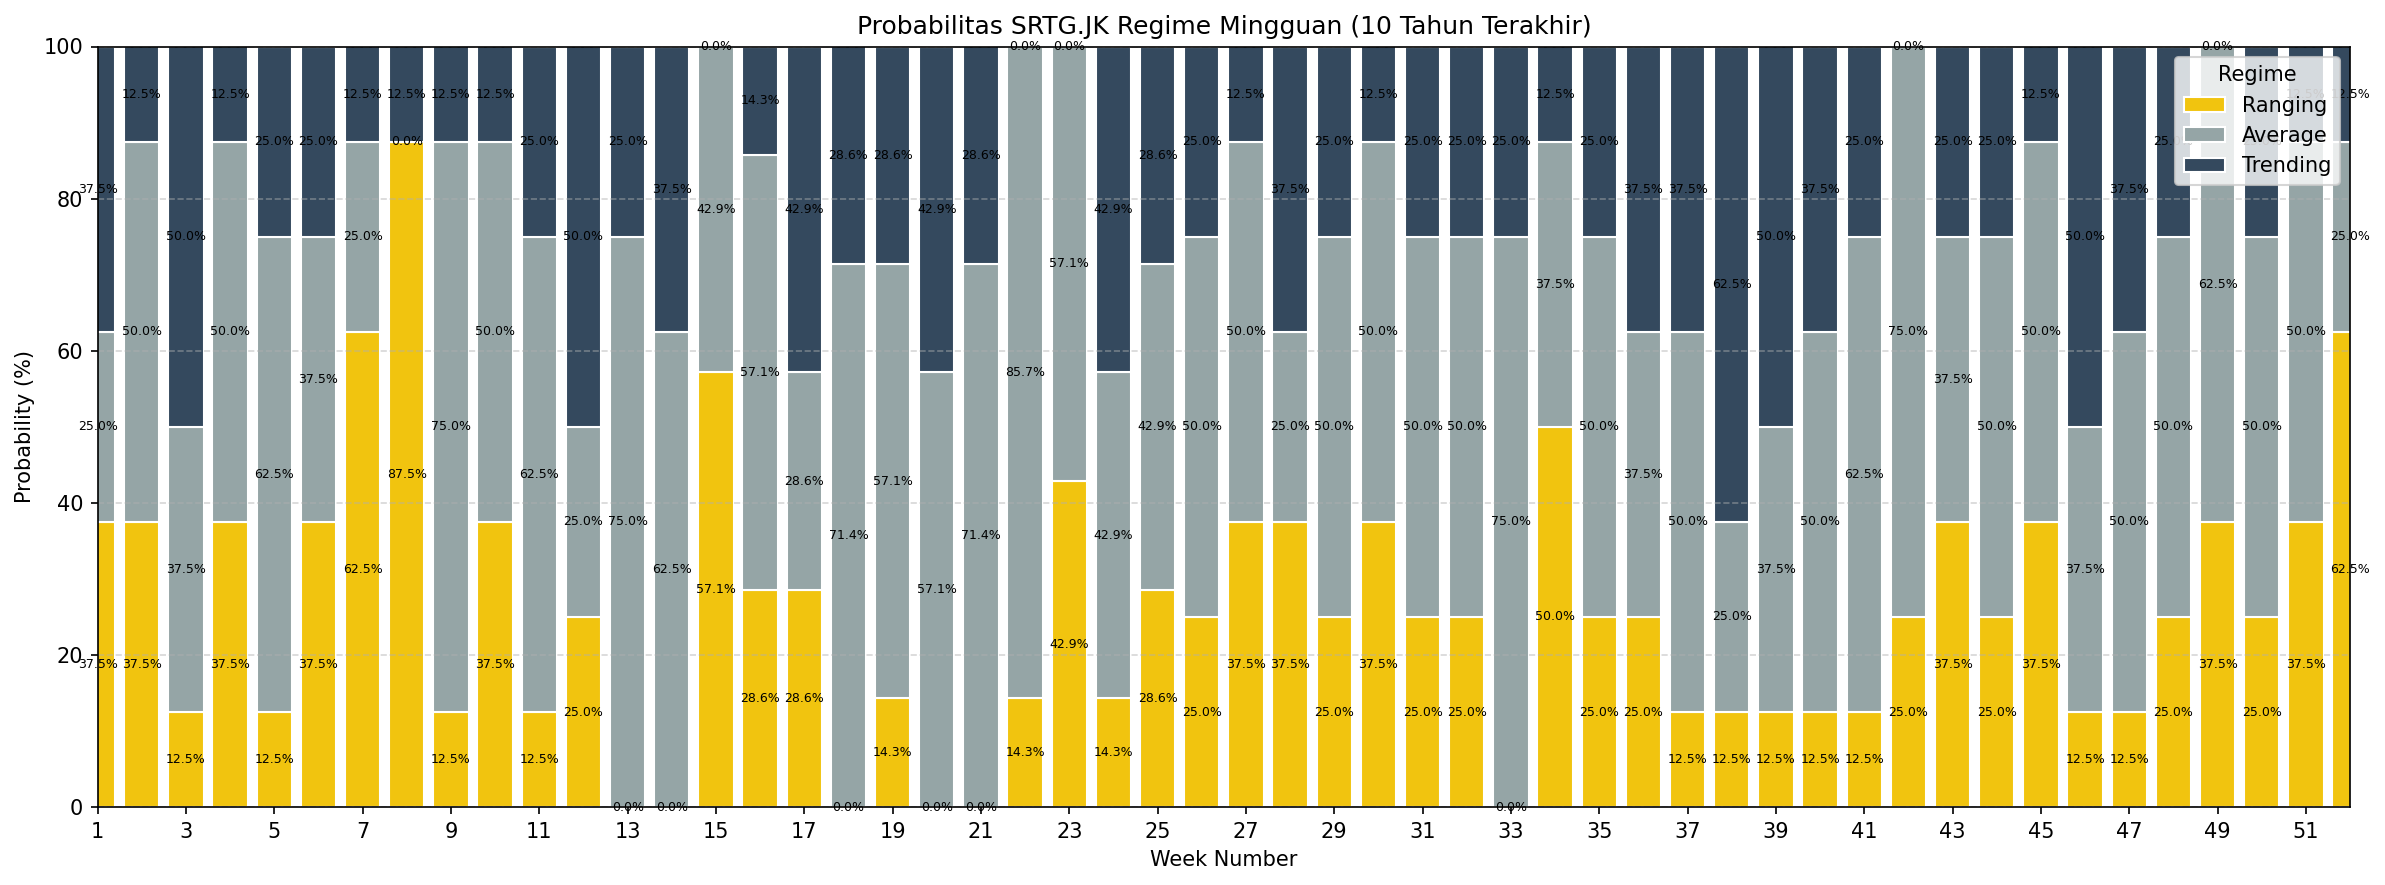

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_and_prepare_adaptively(filepath):
    df = pd.read_csv(filepath)

    # Normalisasi nama kolom
    df.columns = [c.strip().lower() for c in df.columns]

    # Cari kolom tanggal
    date_col = next((col for col in df.columns if 'date' in col), None)
    if not date_col:
        raise ValueError("Tidak menemukan kolom tanggal.")
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.dropna(subset=[date_col])
    df.set_index(date_col, inplace=True)

    # Cari kolom harga (close, price, adj close)
    price_keywords = ['adj close', 'close', 'price']
    price_col = next((col for keyword in price_keywords for col in df.columns if keyword in col), None)
    if not price_col:
        raise ValueError("Tidak menemukan kolom harga.")
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

    # Hitung perubahan absolut harian
    df['abs_diff'] = df[price_col].diff().abs()
    df.dropna(subset=['abs_diff'], inplace=True)

    return df

# ============== LOAD & PROCESS ==============

# Ganti dengan path CSV kamu
filepath = "https_3A_2F_2Ffinance.yahoo.com_2Fquote_2FSRTG.JK_2Fhistory_2F_3Fperiod1_3D1372212000_26period2_3D1749473152.csv"
df = load_and_prepare_adaptively(filepath)

# Resample mingguan dan hitung range mingguan
weekly = df['abs_diff'].resample('W').sum().to_frame(name='range')
weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

# Ambil hanya 10 tahun terakhir
latest_years = weekly['year'].sort_values().unique()[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# Klasifikasi regime per tahun
def classify(group):
    q1 = group['range'].quantile(0.25)
    q3 = group['range'].quantile(0.75)
    return group['range'].apply(lambda x: 'Ranging' if x <= q1 else 'Trending' if x >= q3 else 'Average')

weekly['regime'] = weekly.groupby('year', group_keys=False).apply(classify)

# Hitung probabilitas per minggu
prob = weekly.groupby(['week', 'regime']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100

# ============== PLOT CHART ==============

fig, ax = plt.subplots(figsize=(16, 6), dpi=150)

colors = {'Ranging': '#f1c40f', 'Average': '#95a5a6', 'Trending': '#34495e'}
bottom = np.zeros(len(prob))
bars = {}

for regime in ['Ranging', 'Average', 'Trending']:
    vals = prob.get(regime, pd.Series(0, index=prob.index))
    bars[regime] = ax.bar(prob.index, vals, bottom=bottom,
                          color=colors[regime], label=regime, edgecolor='white')
    bottom += vals

# Tambahkan label persentase
for regime, bc in bars.items():
    ax.bar_label(bc, fmt='%.1f%%', label_type='center', fontsize=6, color='black')


# Finalisasi chart
ax.set_title("Probabilitas SRTG.JK Regime Mingguan (10 Tahun Terakhir)")
ax.set_xlabel("Week Number")
ax.set_ylabel("Probability (%)")
ax.set_xlim(1, 52)
ax.set_xticks(np.arange(1, 53, 2))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(title='Regime', loc='upper right')
plt.tight_layout()

# Simpan ke PNG
plt.savefig("SRTGJK_weekly_regime_with_table.png", bbox_inches='tight')
plt.show()


In [15]:
# --- Info: Hari ini minggu ke berapa ---
today = pd.Timestamp.today()
week_num = today.isocalendar().week
year_num = today.year

print(f"📅 Hari ini ({today.date()}) adalah minggu ke-{week_num} di tahun {year_num}.")

📅 Hari ini (2025-06-10) adalah minggu ke-24 di tahun 2025.
